Assignment activity 1: Make predictions with regression (Simple & Multiple Linear Regression)

Objective:
What price should be set for the Lego sets with 8,000 Lego pieces? (Simple linear regression)

In [2]:
#Prepare your workstation 

In [3]:
#import all the necessary packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [4]:
# Sense Check the data set

In [5]:
#Import the data set 
df_lego = pd.read_csv('lego.csv')

In [6]:
# View the dataset
df_lego.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.99,2,277,4.0,0,20
1,19,19.99,2,168,4.0,2,20
2,19,12.99,11,74,4.3,2,20
3,5,99.99,23,1032,3.6,0,20
4,5,79.99,14,744,3.2,1,20


In [7]:
# Check datatype, missing values, number of rows and columns in the dataset
df_lego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  int64  
 1   list_price         12261 non-null  float64
 2   num_reviews        12261 non-null  int64  
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   12261 non-null  float64
 5   review_difficulty  12261 non-null  int64  
 6   country            12261 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 670.6 KB


As seen above the data set contains 7 columns and 12261 rows and no missing values

In [8]:
# view the basic summary statistics of the dataset
df_lego.describe()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
count,12261.00000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,16.68828,65.141998,14.603050,493.405921,3.709689,1.988826,10.015333
std,8.21868,91.980429,34.356847,825.364580,1.641130,1.787565,6.185450
min,0.00000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000
25%,11.00000,19.990000,1.000000,97.000000,3.600000,0.000000,4.000000
50%,19.00000,36.587800,4.000000,216.000000,4.400000,2.000000,10.000000
75%,23.00000,70.192200,11.000000,544.000000,4.700000,4.000000,15.000000
max,30.00000,1104.870000,367.000000,7541.000000,5.000000,5.000000,20.000000


The summary statistics show the measures of central tendency (mean , median) and measures of variabilty ( standard deviation, min value , maximum value) of each column. 

In [9]:
# Define the dependent and independant variables for the linear Regression model

In [10]:
# dependent variable
y = df_lego['list_price'].values.reshape(-1, 1) 
# independent variable
X = df_lego['piece_count'].values.reshape(-1, 1) 

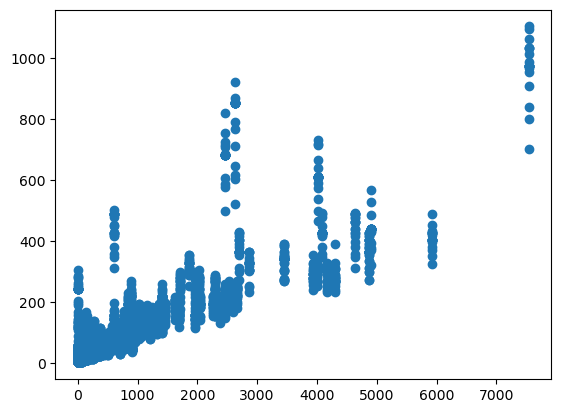

In [11]:
# check for linearity
plt.scatter(X,y)
plt.show()

linear regression needs the relationship between the independent and dependent variables to be linear, which can be seen above in the scatterplot.

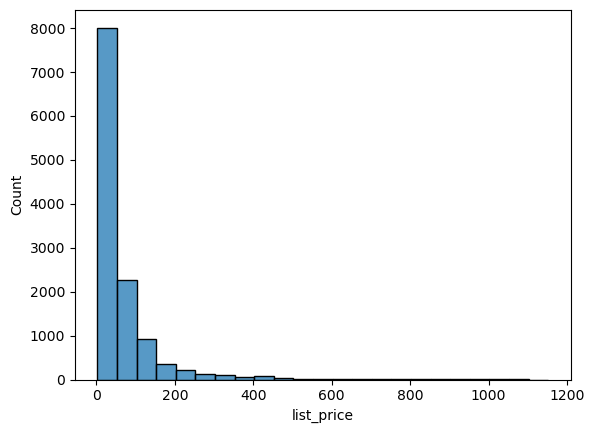

In [12]:
# cheking the distrubution of the dependant variable
sns.histplot( x="list_price", data =df_lego,binwidth=50)
plt.show()

From the histogram above it can be seen that a larger proportion of the the lego products fall under the $100 list price suggesting a positive skew.

In [13]:
# Split the dataset

Split the data ( Train & Test)

We need to split our variables into training and testing sets. Using the training set, we’ll build the model and perform the model on the testing set. We’ll divide the training and testing sets into a 7:3 ratio, respectively.

In [14]:
# split the data into training = 0.7 and testing = 0.3 subsets
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)

In [15]:
# Run a linear Regression

In [16]:
# run linear regression
lr = LinearRegression()

In [17]:
# fit the model on the training data
lr.fit(x_train, y_train)

LinearRegression()

In [18]:
#use  predict() for predicting on the x_test
y_pred = lr.predict(x_test)

In [19]:
# Plot the regression 

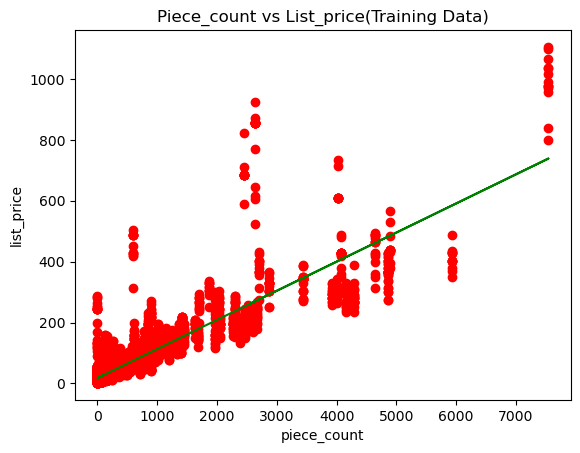

In [20]:
# Training dataset Visualization
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, lr.predict(x_train), color = "green")
plt.title("Piece_count vs List_price(Training Data)")
plt.xlabel("piece_count")
plt.ylabel("list_price")

plt.show()

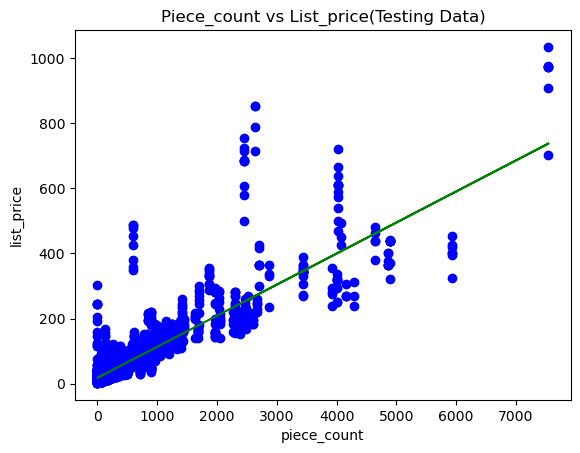

In [21]:
# Testing Visualisation
plt.scatter(x_test, y_test, color = "blue")
plt.plot(x_train, lr.predict(x_train), color = "green")
plt.title("Piece_count vs List_price(Testing Data)")
plt.xlabel("piece_count")
plt.ylabel("list_price")

plt.show()

In [ ]:
# Print the values

In [14]:
# print the R-squared value
print("R-squared value:" ,lr.score(x_train,y_train))

R-squared value: 0.7529271656910888


R-squared value is 0.752, which means that 75.2% of the list_price variance can be explained by the piece_count column using this line.

In [15]:
print("Intercept value: ", lr.intercept_)
print("Coffecient value: ", lr.coef_)

Intercept value:  [17.6347917]
Coffecient value:  [[0.09553496]]


In [16]:
# Predict Value
predicted_value = lr.predict([[8000]])

In [17]:
print(predicted_value)

[[781.91443965]]


According to the linear regression model the predicted price at which a lego set with 8000 pieces should be sold is $781.91. 

In [ ]:
# Multiple Linear Regression:

Objective:

What price should be set for the Lego sets with 8,000 Lego pieces that are most likely to be purchased by 30-year-old customers? (Multiple linear regression)

In [ ]:
# Define the dependent and independant variables for the linear Regression model

In [22]:
# dependent variable
y = df_lego['list_price']
 # independent variable
X = df_lego[['ages','piece_count']]

In [23]:
# split the data into training = 0.7 and testing = 0.3 subsets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

In [24]:
# run multiple linear regression
multi = LinearRegression() 

In [25]:
# fit the model on the training data
multi.fit(x_train, y_train)

LinearRegression()

In [26]:
#use  predict() for predicting on the x_train
multi.predict(x_train)

array([105.31946916,  38.79803594,  25.21506289, ...,  28.52852519,
        26.36951271,  44.92267922])

In [27]:
# Checking the value of R-squared, intercept and coefficients
print("R-squared: ", multi.score(x_train, y_train))
print("Intercept: ", multi.intercept_)
print("Coefficients:")
list(zip(x_train, multi.coef_))

R-squared:  0.7681985466459664
Intercept:  16.985596749203523
Coefficients:


[('ages', 0.029872780947021282), ('piece_count', 0.09569755116044483)]

R-squared value is 0.768, which means that 76.8% of the list_price variance can be explained by the piece_count and ages column using this line.

In [35]:
# Predict Value
New_ages= 30
New_piece_count = 8000
print ('Predicted Value: \n', multi.predict([[New_ages ,New_piece_count]])) 

Predicted Value: 
 [783.46218946]


In [28]:
#Training and testing subsets with Multiple Linear Regression
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
Y_pred = model.predict(sm.add_constant(x_train))
print_model = model.summary()

print(print_model)

                            OLS Regression Results                            
Dep. Variable:             list_price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                 1.422e+04
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:17:12   Log-Likelihood:                -44428.
No. Observations:                8582   AIC:                         8.886e+04
Df Residuals:                    8579   BIC:                         8.888e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.9856      1.107     15.341      

/Users/oliya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
print(multi.score(x_train,y_train)*100)

76.81985466459665


In [ ]:
# Check the model with OLS

In [30]:
# run regression on the train subset
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [31]:
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
Y_pred = model.predict(sm.add_constant(x_train))
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             list_price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                 1.422e+04
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:18:20   Log-Likelihood:                -44428.
No. Observations:                8582   AIC:                         8.886e+04
Df Residuals:                    8579   BIC:                         8.888e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.9856      1.107     15.341      

/Users/oliya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [32]:
# Predict train dataset
y_pred_mlr= mlr.predict(x_train)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [105.31946916  38.79803594  25.21506289 ...  28.52852519  26.36951271
  44.92267922]


In [33]:
print(mlr.score(x_train,y_train)*100)

76.81985466459665


In [34]:
# Determine Mean absolute Error
meanAbErr = metrics.mean_absolute_error(y_train, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_train, y_pred_mlr)

print('R squared: {:.2f}'.format(mlr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)

R squared: 75.61
Mean Absolute Error: 19.973823111151994
Mean Square Error: 1836.79826754095


In [36]:
# Predicted Value
New_ages = 30
New_piece_count = 8000
print ('Predicted Value: \n', mlr.predict([[New_ages ,New_piece_count]]))

Predicted Value: 
 [783.46218946]


According to the multiple linear regression model the predicted price at which a lego set with 8000 pieces likely to be purchased by 30 year olds is $ 783.46.